# AIDI 1100_02 FINAL PROJECT 
##### The purpose of this project to extract and analyze different stocks from the website https://www.prnewswire.com/news-releases/news-releases-list/

Group-1<br>
Members: Joseph Mendez, Hung-yi Chen, 
Ronak Kumar, Kartik Sharma, Yash Halani<br>
Course code: AIDI-1100 Section 02<br>
Submission Date: 2021-12-02<br> <br>
Strategy for the code distribution
*   Ronak Kumar: Scan/Parse, Track/Store, Stock recommendation
*   Hung-yi Chen: Search, Edit, Organize coding structure
*   Joseph Mendez: Powerpoint preparation, Visualization
*   Kartik Sharma: Visualization
*   Yash Halani: Retrieve yahoo finance



# Section 1. Scan/Parse
1. Use libraries
  *   urllib.request - Extensible library for opening URLs
  *   BeautifulSoup - Web scraping
  *   CSV - Write scraping content in csv file
2. Limit render pages up to 5 to control processing time in 2 minutes. <br>
It took more than 30 minutes to complete for 1 week data content scraping <br>
(35pages, 100 articles/page, real-time test:
Successfully Written 3500 records to the CSV file.
Wall time: 32min 46s.)
3. Apply "User-Agent" to identify the application, OS etc.


In [ ]:
import urllib.request 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Constant values to fetch the pages from the BASE_URL below
PAGE_NUMBER = 1
LAST_PAGE = 1
URLS = []

while PAGE_NUMBER <= LAST_PAGE:
  # Fetching the URLS from the BASE_URL with a custom page size of 100
  BASE_URL = 'https://www.prnewswire.com/news-releases/news-releases-list/?page={}&pagesize=100'.format(PAGE_NUMBER)

  # Calling the Request method from the urllib library
  req = urllib.request.Request(BASE_URL, headers={"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
                                                  "X-Requested-With": "XMLHttpRequest"})
  page = urllib.request.urlopen(req)

  # Parsing the fetched URL using BeautifulSoup
  soup = BeautifulSoup(page,"html.parser")

  # Fetching all the hyperlinks from the HTML Class 'newsreleaseconsolidatelink display-outline'
  for URL in soup.find_all("a", {"class": "newsreleaseconsolidatelink display-outline"}):
      URLS.append('https://www.prnewswire.com' + URL.get('href'))

  PAGE_NUMBER += 1

# Section 2-1. Track/Store
1. Use libraries
  *   csv - Write scraping content on a csv file
  *   os - Operating system dependent functionality: open file
2. Track/Store: Pack writing content to file into a module


In [ ]:
import os
import csv

# Function to write CSV into the file
def write_csv(title, source, time, body, symbols, URL):
    # Headers for the file
    headers = ['Title', 'Source', 'Time', 'Body', 'Stock symbol']

    # Creating a dictionary for storing the parameters
    news_data = {
        headers[0]: title,
        headers[1]: source,
        headers[2]: time,
        headers[3]: body,
        headers[4]: symbols
    }

    # Writing the 'newsdata.csv' file in append mode. If its writing for the first time, it will just write the headers, else it will insert the row based upon the input parameters
    with open('newsdata.csv', 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = headers)
        if(URL == 0):
            writer.writeheader()
        writer.writerow(news_data)

# Section 2-2. Search
1. Use libraries
  *   Pandas - Excels are specific industries tickers dataset, read excels for further matching with tickers we found from web scraping.
2. Search: First, try to focus on oil & gas or bank & finance two industies. Second, if there is less than 3 tickers in the same industy, we use all the tickers found in the file for further analysis.
3. A list "stock_exchange_markets" limits tickers store format to make sure all tickers are the correct format. - There are few articles have different HTML structure than the norm. Due to the complexity and low cost/value for fixing the abnormal tickers, using a fixed format to screen tickers before actually store them is a better choice.
4. Add built-in magic commands %%time to monitor processing time.
5. Use try/except to prevent errors occurance to stop the following processes.


In [ ]:
# Add two excels to the folder before run below cells

In [ ]:
# Read our focus industries symbol list
import pandas as pd
df_oil_gas = pd.read_excel("OilandGasSymbols_NASDAQ.xlsx").tickers
df_bank_finance = pd.read_excel("BankandFinancialServices_NASDAQ.xlsx").tickers

In [ ]:
# Track processing time
%%time
# Removing the older newsdata.csv file its present
if(os.path.isfile('newsdata.csv')):
    os.remove('newsdata.csv')

# Empty global variables
oil_gas_match = [] # if any match tickers, store in here
bank_finance_match = [] 
all_symbols = [] # store all tickers found in the articles
stock_exchange_markets =["NASDAQ: ","NYSE: ", "OTCQX: ", "TSXV: ", "LSE: ", "TSX: ", "TWSE: "] # main markets in the world, for screening tickers before storing in the csv
# based on https://www.tradinghours.com/markets 

for URL in range(len(URLS)):
    try:
      # Fetching the URL
      req = urllib.request.Request(URLS[URL], headers={"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
                                                       "X-Requested-With": "XMLHttpRequest"})
      page = urllib.request.urlopen(req)
      
      # Parsing the fetched URL using BeautifulSoup
      soup = BeautifulSoup(page,"html.parser")


      # Extracting the features like title, source, time and body
      title = soup.title.contents[0]
      source = soup.findAll("strong")[1].text.strip()
      time = "".join(soup.find("p", {"class": "mb-no"}))
      body = soup.find("div", {"class": "col-sm-10 col-sm-offset-1"}).contents

      symbols = [] # Local variable: symbols for each article/row, so set it as a local variable
      ticker_symbols = soup.findAll("a", {"class": "ticket-symbol"}) # web scraping to find tickers in articles
      
      for ticker_symbol in ticker_symbols:
          market = str(ticker_symbol.previous_sibling).split("(")[-1] # searching stock exchange markets name and separate it
          if market in stock_exchange_markets: # check is scraped-stock-exchange-name format correct, if yes, proceed with the following steps
            ticker = str(ticker_symbol).split(">")[-2].split("<")[-2] # searching tickers and separate it
            market_ticker = market + ticker
            symbols.append(market_ticker) # store tickers full name to the dataset
            all_symbols.append(market_ticker)
            if market_ticker in df_bank_finance: # if a ticker is belongs to bank and financial industry, store it in a match list
              bank_finance_match.append(market_ticker)
            if market_ticker in df_oil_gas:  # if a ticker is belongs to oil and gas industry, store it in another match list
              oil_gas_match.append(market_ticker)
      write_csv(title, source, time, body, symbols, URL)

      # Writing 100 records at a time
      if((URL+1) % 100 == 0):
        print("Successfully Written {} records to the CSV file".format(URL+1))
    except:
      print('URL not working: {}'.format(URLS[URL]))
      continue

Successfully Written 100 records to the CSV file
CPU times: user 12.6 s, sys: 154 ms, total: 12.8 s
Wall time: 24.7 s


# Section 3. Retrieve Data (Web (API))
1. Use libraries
  *   yfinance - One of the most recommend libraries for fetch data from Yahoo! Finance's API.
  *   pytz - Allows accurate and cross platform timezone calculations.
  *   datetime - Supplies classes for manipulating dates and times.
  *   timedelta - Manipulates time using time duration.
2. Use current time to fetch a real time stock data from Yahoo Finance to past 30 days (except non-business days).
3. Create three modules: remove_duplication, get_stock & check_stock
  *   remove_duplication: Use dictionary has no duplicated key nature to remove tickers duplications in the list.
  *   get_stock: Takes three parameters as input, matched symbol list, today, 30 days from today, to find and save stock information to a desirable format (pandas.DataFrame).
      *   .Zip() : for loop contains two attributes to iterate, how many tickers' to be found and matched symbol list. Therefore, use zip() to join two tuples together in this for loop.
      *   Reset index for pandas.DataFrame : yfinance.history uses date as index, so we need to reset date as a new index in order to create an easier manipulate dataframe.
      *   Price format has been controlled by .round() to 2 decimals.
      *   Try/except: to prevent error from yfinance cannot find stock information on yahoo finance API. For "yfinance returns empty dataframe", there is no easy solution for now, change other library would be the fastest solution (ref: # https://github.com/ranaroussi/yfinance/issues/191)
  *   check_stock: Takes stock_history object and extracts the stocks from them. It reverses the list so that the past data is in chronological order. Checks for the list of stocks, if its sorted -> BUY STOCK!, if its reverse sorted meaning NOT BUY STOCK!, else it prints out WAIT BEFORE BUYING STOCK!








In [ ]:
!pip install yfinance
import yfinance as yf
from datetime import datetime, timedelta
import pytz

In [ ]:
# Get a timestamp for toronto timezone
utc_now = pytz.utc.localize(datetime.utcnow()) # get utc time in order to convert the time to Toronto timezone
edt_now = utc_now.astimezone(pytz.timezone("America/Toronto")) # convert to Toronto time zone
today = edt_now.strftime('%Y-%m-%d') # set timezone format to YYYY-MM-DD
delta = timedelta(days=30) # set a 30 days time difference  
last_30_days = (edt_now - delta).strftime('%Y-%m-%d') # set format to YYYY-MM-DD
print("timeframe:", last_30_days," to ", today)

timeframe: 2021-11-02  to  2021-12-02


In [ ]:
# Function to remove duplicate tickers in the lists
def remove_duplication(target_list):
  target_list = list(dict.fromkeys(target_list)) 
  return target_list
  # dictionary cannot have duplicated key, so convert a list to dictionary
  # and convert it back to a list

In [ ]:
stock_history = {}

# Function to plot a chart after in each get_stock def
def plt_chart_price(data_set, market_symbol):
  #set the figure size
  plt.figure(figsize=(16,8))
  #using the data_set, select Date, and price
  plt.plot(data_set.Date, data_set['Price(Close)'],'r,-',label='Price(Close)')
  #generate the legend
  plt.legend()
  # Set the title
  plt.title(market_symbol, fontdict={'fontweight':'bold','fontsize':16})
  #set the y label
  plt.ylabel('Stock Close Prices', fontdict={'fontweight':'bold','fontsize':16})
  plt.show()

# Function to plot a chart after in each get_stock def
def plt_chart_volume(data_set, market_symbol):
  #set the figure size
  plt.figure(figsize=(16,8))
  #using the data_set, select Date, and volume
  plt.plot(data_set.Date, data_set['Volume'],'r,-',label='Volume')
  #generate the legend
  plt.legend()
  # Set the title
  plt.title(market_symbol, fontdict={'fontweight':'bold','fontsize':16})
  #set the y label
  plt.ylabel('Stock Volume', fontdict={'fontweight':'bold','fontsize':16})
  plt.show()

# Function to check whether to BUY STOCK, NOT BUY STOCK, WAIT BEFORE BUYING STOCK
def check_stock(stock_history):
  # Iterating over the stock_history object
  for stock in stock_history:
    print('Checking for Stock {}'.format(stock))
    # Reversing the list since to read the data in chronological order 
    close_values = stock_history[stock][::-1]
    print(close_values)

    # Checking all the elements in the list. If its sorted, meaning BUY STOCK!
    if(all(close_values[i] <= close_values[i+1] for i in range(len(close_values)-1))):
      print('---------------- BUY STOCK! ------------------------')
    # Checking all the elements in the list. If its reverse sorted, meaning NOT BUY STOCK!
    elif(all(close_values[i] >= close_values[i+1] for i in range(len(close_values)-1))):
      print('---------------- NOT BUY STOCK! --------------------')
    # Checking all the elements in the list. If its not sorted, meaning WAIT BEFORE BUYING STOCK!
    else:
      print('---------- WAIT BEFORE BUYING STOCK! ---------')

def get_stock(symbol_list,first_date,today):
  symbol_list = remove_duplication(symbol_list) # remove duplicated symbol before retrieving stock information from yahoo finance API
  for index, market_symbol in zip(range(3), symbol_list) :
    try:
      ticker_data=yf.Ticker(market_symbol.split(" ")[-1])
      df_ticker=ticker_data.history(period='1d',start=first_date,end=today)
      stock_history[market_symbol] = df_ticker[['Close']].values
      dataFrame_df_ticker = df_ticker.reset_index()
      data = {"Date":dataFrame_df_ticker.Date, "Price(Close)":round(dataFrame_df_ticker.Close,2), "Volume":dataFrame_df_ticker.Volume}
      df_stock = pd.DataFrame(data)
      print(market_symbol)
      print(df_stock)
      plt_chart_price(df_stock, market_symbol)
      plt_chart_volume(df_stock, market_symbol)
      print("----------------------------------------------------")
    except:
      continue

NYSE: AMC
         Date  Price(Close)    Volume
0  2021-11-02         38.79  44361700
1  2021-11-03         40.79  82198000
2  2021-11-04         40.05  28553700
3  2021-11-05         41.70  39940600
4  2021-11-08         45.06  70347800
5  2021-11-09         39.93  37893500
6  2021-11-10         38.29  32463600
7  2021-11-11         39.46  30474100
8  2021-11-12         40.00  23561400
9  2021-11-15         42.68  39918800
10 2021-11-16         42.60  38388200
11 2021-11-17         42.13  23322000
12 2021-11-18         40.41  25262000
13 2021-11-19         40.87  20692300
14 2021-11-22         41.24  28831800
15 2021-11-23         39.16  27386500
16 2021-11-24         38.89  18270800
17 2021-11-26         37.63  19731800
18 2021-11-29         36.84  24063800
19 2021-11-30         33.94  41354800
20 2021-12-01         28.57  63296100


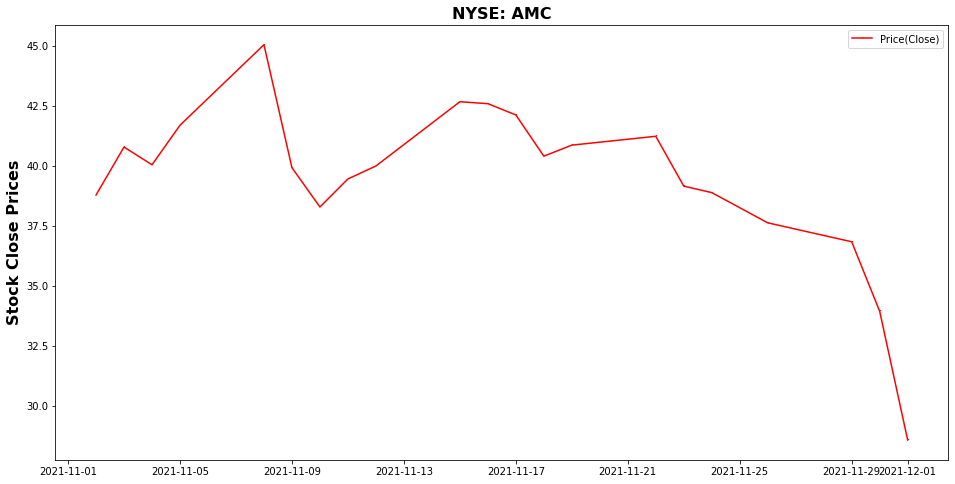

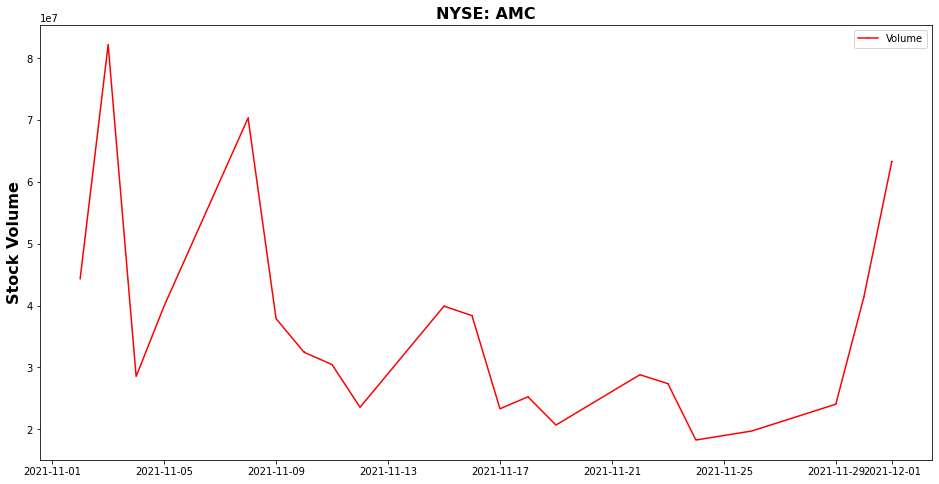

----------------------------------------------------
NYSE: CNK
         Date  Price(Close)   Volume
0  2021-11-02         20.71  3468800
1  2021-11-03         20.83  5879700
2  2021-11-04         20.43  3094200
3  2021-11-05         22.11  7260100
4  2021-11-08         21.65  4160000
5  2021-11-09         21.76  4304600
6  2021-11-10         21.23  3418900
7  2021-11-11         21.25  1857300
8  2021-11-12         20.45  2408800
9  2021-11-15         20.53  3158800
10 2021-11-16         20.53  1664300
11 2021-11-17         19.56  2225900
12 2021-11-18         19.09  2789300
13 2021-11-19         17.98  4303300
14 2021-11-22         18.02  2480700
15 2021-11-23         17.22  2566900
16 2021-11-24         16.91  3883200
17 2021-11-26         16.00  4645300
18 2021-11-29         16.22  3899300
19 2021-11-30         15.52  8861800
20 2021-12-01         15.21  4923800


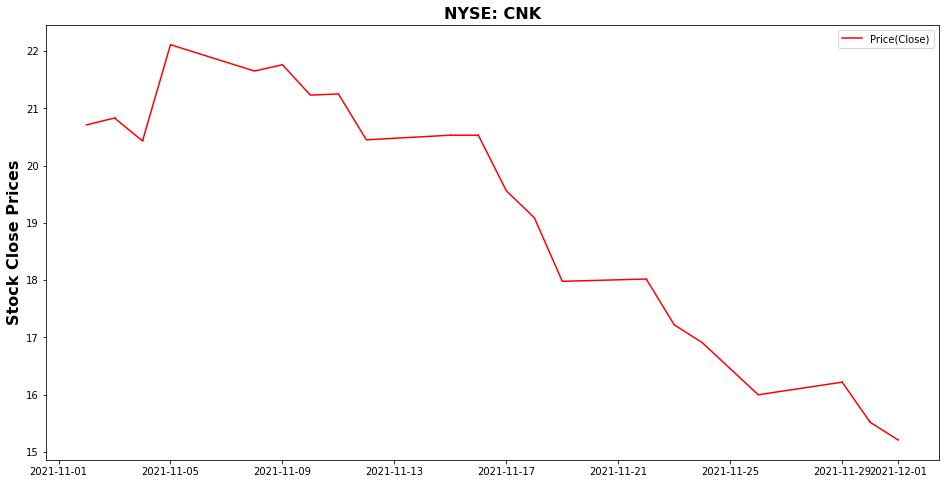

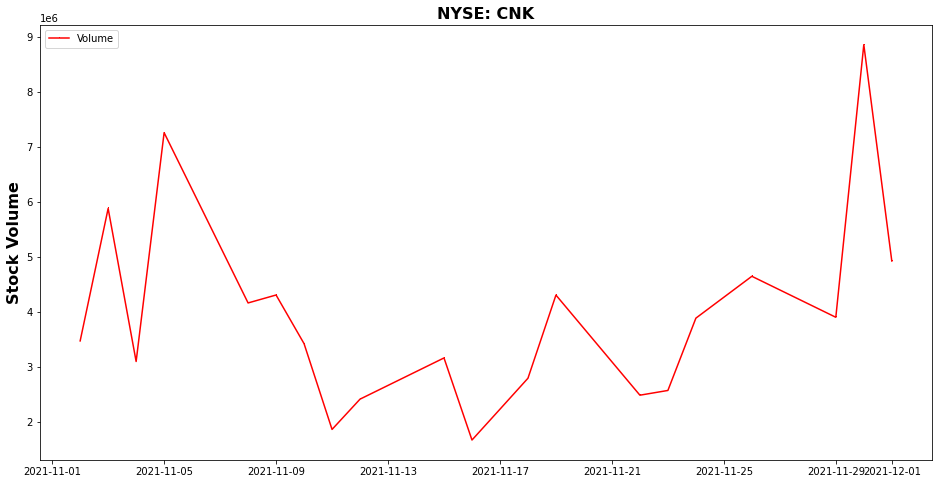

----------------------------------------------------
OTCQX: GRAMF
         Date  Price(Close)   Volume
0  2021-11-02          2.84   207000
1  2021-11-03          2.85   124200
2  2021-11-04          2.77   109900
3  2021-11-05          3.23   331200
4  2021-11-08          3.11   633500
5  2021-11-09          3.26   372700
6  2021-11-10          3.16   370000
7  2021-11-11          3.32   297900
8  2021-11-12          3.33   669000
9  2021-11-15          3.08   433800
10 2021-11-16          2.42  1374500
11 2021-11-17          2.32   356700
12 2021-11-18          2.28   623300
13 2021-11-19          2.21   184400
14 2021-11-22          2.17   251900
15 2021-11-23          2.12   194600
16 2021-11-24          2.09   207900
17 2021-11-26          2.00   227500
18 2021-11-29          1.92   123400
19 2021-11-30          1.69   544500
20 2021-12-01          1.62   290100


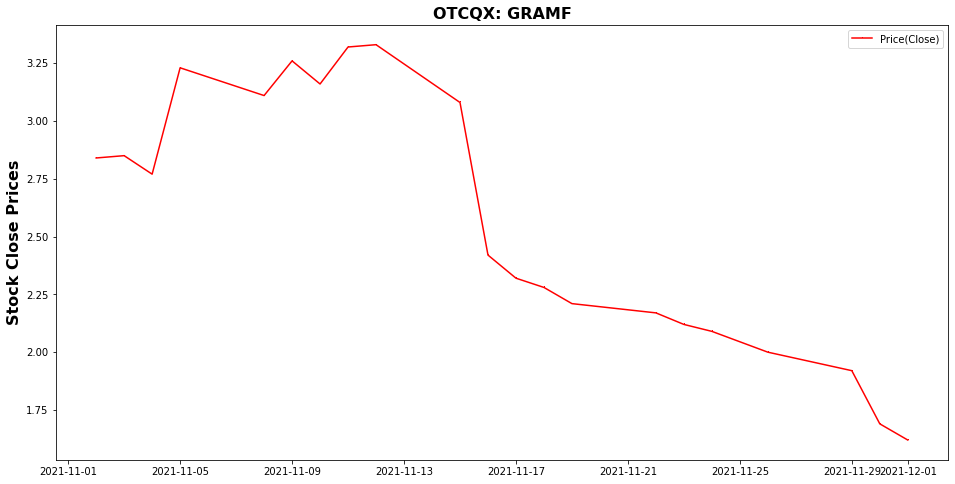

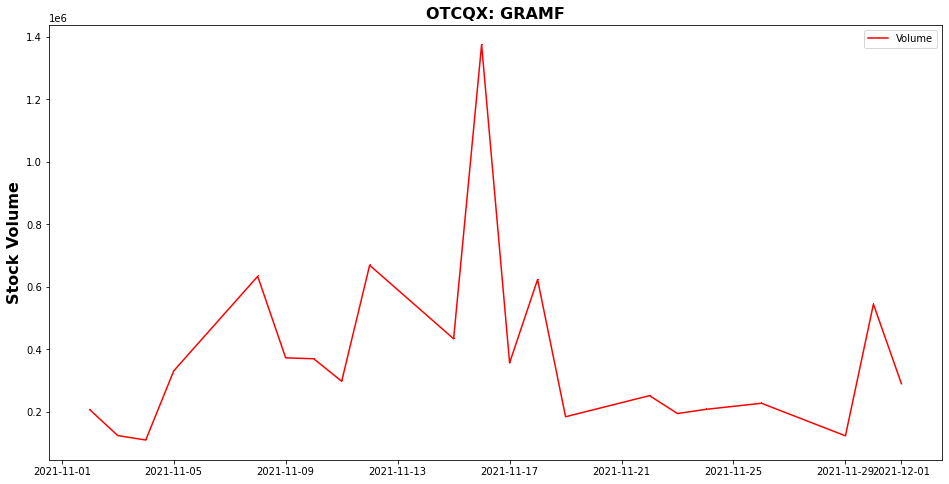

----------------------------------------------------


In [ ]:
if len(oil_gas_match) >= 3:
  get_stock(oil_gas_match,last_30_days,today)
elif len(bank_finance_match) >= 3:
  get_stock(bank_finance_match,last_30_days,today)
else:
  get_stock(all_symbols,last_30_days,today)

In [ ]:
# Stock analysis and recommend
check_stock(stock_history)

Checking for Stock NYSE: AMC
[[28.56999969]
 [33.93999863]
 [36.84000015]
 [37.63000107]
 [38.88999939]
 [39.15999985]
 [41.24000168]
 [40.86999893]
 [40.40999985]
 [42.13000107]
 [42.59999847]
 [42.68000031]
 [40.        ]
 [39.45999908]
 [38.29000092]
 [39.93000031]
 [45.06000137]
 [41.70000076]
 [40.04999924]
 [40.79000092]
 [38.79000092]]
---------- WAIT BEFORE BUYING STOCK! ---------
Checking for Stock NYSE: CNK
[[15.21000004]
 [15.52000046]
 [16.21999931]
 [16.        ]
 [16.90999985]
 [17.21999931]
 [18.02000046]
 [17.97999954]
 [19.09000015]
 [19.55999947]
 [20.53000069]
 [20.53000069]
 [20.45000076]
 [21.25      ]
 [21.22999954]
 [21.76000023]
 [21.64999962]
 [22.11000061]
 [20.43000031]
 [20.82999992]
 [20.70999908]]
---------- WAIT BEFORE BUYING STOCK! ---------
Checking for Stock OTCQX: GRAMF
[[1.62      ]
 [1.69000006]
 [1.91900003]
 [2.        ]
 [2.08899999]
 [2.11999989]
 [2.17000008]
 [2.20600009]
 [2.27999997]
 [2.31500006]
 [2.42199993]
 [3.07500005]
 [3.32999992]
 [